<a href="https://colab.research.google.com/github/MonkeyWrenchGang/2021-ban7002/blob/main/Week_4_For_loop_Automation_%26_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#
You've been hired by the "Worldwide Hub of Online Optimized Poker Association Systems and Services" to analyze theier data. They have a dataset of 20k example players your job is to automate their typical analysis!

# Automating Exploratory Data Analysis using For Loops

Let's take a look at using FOR loops, Pandas and Seaborn to automate the process of Exploratory Data Analysis (EDA).

EDA is a super important activity to provide context to your data and highlights potential issues that could arise later on, such as missing values, outliers, or skewed data.

While EDA is super important, IT IS also super repetitive, For example plotting histograms for each numeric variable or plotting frequency analysis of categorical variables. This is where `for` loops come in handy.

## For Loops in Python

As we now know a `for loop` is used for iterating over a sequence (like a list, tuple, or dictionary keys) or other iterable objects. Using a for loop, we can automate the repetitive parts of an EDA, which saves time and reduces the chances of making mistakes.

Here's the most basic example of a for loop in Python:

```python
for i in range(5):
    print(i)
```

## Automating EDA

In this notebook, we will be using for loops in Python to automate the following parts of the EDA process:

1. Creating descriptive statistics for each numeric variable.
2. Creating a frequency analysis of categorical variables.
3. Plotting histograms of numeric varaibles
4. Plotting frequency analysis of categorical variables.




## to get started!

1. we need to import our data
2. we need to create a list of numeric variables
3. we need to create a list of categegorical variables
4. follow our automation recipe
  - get baseline code working
  - identify what changes in each run
  - setup a forloop and run it.

## Import Libraries


---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Import Data


---



In [ ]:
poker = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/2023_BAN6005/main/module_3/data/poker_20k.csv")
poker.head()

,hours_played_sitting,number_of_tables,vluntarily_put_money_into_pot,pot_preflop_raising,went_to_showdown,player_country,player_pro_y_n,player_prev_location,EVENT_TIMESTAMP,EVENT_LABEL
0,28.0,455.0,42.0,45.0,193.0,UK,No,Orlando,2023-07-24 08:50:55,legit
1,38.0,629.0,29.0,44.0,84.0,UK,No,Orlando,2023-07-24 08:51:25,legit
2,20.0,600.0,60.0,57.0,267.0,CAN,Yes,Tampa,2023-07-24 08:51:24,legit
3,18.0,606.0,47.0,68.0,318.0,RUS,Yes,Tampa,2023-07-24 08:51:21,legit
4,18.0,558.0,42.0,70.0,295.0,RUS,Yes,Tampa,2023-07-24 08:51:23,legit


# select_dtypes


---

Numeric Variables
```
numeric_vars = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

numeric_vars
```
Categorical:

```
categorical_vars = df.select_dtypes(include=['object']).columns.to_list()
categorical_vars
```

In [ ]:
numeric_vars = poker.select_dtypes(include=['int64', 'float64']).columns.to_list()
numeric_vars

['hours_played_sitting',
 'number_of_tables',
 'vluntarily_put_money_into_pot',
 'pot_preflop_raising',
 'went_to_showdown']

In [ ]:
categorical_vars = poker.select_dtypes(include=['object']).columns.to_list()
categorical_vars

['player_country',
 'player_pro_y_n',
 'player_prev_location',
 'EVENT_TIMESTAMP',
 'EVENT_LABEL']

# Descriptive Statistics


---

For each numeric variable:
  calculate descrptive stats
  


In [ ]:
column = 'hours_played_sitting'
print(f"descriptive stats for {column}")
poker[column].describe()

descriptive stats for hours_played_sitting


count    20000.000000
mean        25.095700
std          6.816631
min          1.000000
25%         20.000000
50%         25.000000
75%         31.000000
max         47.000000
Name: hours_played_sitting, dtype: float64

In [ ]:
for column in numeric_vars:
  print(column)

hours_played_sitting
number_of_tables
vluntarily_put_money_into_pot
pot_preflop_raising
went_to_showdown


In [ ]:
for column in numeric_vars:
  print(f"descriptive stats for \'{column}\':")
  print(poker[column].describe())
  print("\n")

descriptive stats for 'hours_played_sitting':
count    20000.000000
mean        25.095700
std          6.816631
min          1.000000
25%         20.000000
50%         25.000000
75%         31.000000
max         47.000000
Name: hours_played_sitting, dtype: float64


descriptive stats for 'number_of_tables':
count    20000.000000
mean       498.614100
std         95.258899
min          1.000000
25%        438.000000
50%        497.000000
75%        559.000000
max        999.000000
Name: number_of_tables, dtype: float64


descriptive stats for 'vluntarily_put_money_into_pot':
count    20000.000000
mean        37.641650
std          8.312959
min          2.000000
25%         32.000000
50%         38.000000
75%         43.000000
max         79.000000
Name: vluntarily_put_money_into_pot, dtype: float64


descriptive stats for 'pot_preflop_raising':
count    20000.000000
mean        52.657900
std         14.170124
min          0.000000
25%         42.000000
50%         53.000000
75%         

# Frequency Analysis


In [ ]:
column = 'player_country'
print(f"freq analysis of {column}")
print(poker[column].value_counts())

print(f"\n-------")
print(poker[column].value_counts(normalize=True))

freq analysis of player_country
RUS    9845
CAN    8633
USA     770
UK      752
Name: player_country, dtype: int64

-------
RUS    0.49225
CAN    0.43165
USA    0.03850
UK     0.03760
Name: player_country, dtype: float64


# Fire up FOR LOOP


---



In [ ]:
for column in categorical_vars:
  print(f"freq analysis of {column}")
  print(poker[column].value_counts())

  print("\n-------")
  print(poker[column].value_counts(normalize=True))
  print("\n")

freq analysis of player_country
RUS    9845
CAN    8633
USA     770
UK      752
Name: player_country, dtype: int64

-------
RUS    0.49225
CAN    0.43165
USA    0.03850
UK     0.03760
Name: player_country, dtype: float64


freq analysis of player_pro_y_n
Yes    11165
No      8835
Name: player_pro_y_n, dtype: int64

-------
Yes    0.55825
No     0.44175
Name: player_pro_y_n, dtype: float64


freq analysis of player_prev_location
Tampa           7425
Orlando         6936
Key West        4723
Jacksonville     659
Miami            257
Name: player_prev_location, dtype: int64

-------
Tampa           0.37125
Orlando         0.34680
Key West        0.23615
Jacksonville    0.03295
Miami           0.01285
Name: player_prev_location, dtype: float64


freq analysis of EVENT_TIMESTAMP
2023-07-24 08:50:56    390
2023-07-24 08:51:06    381
2023-07-24 08:51:34    371
2023-07-24 08:51:01    368
2023-07-24 08:51:14    358
                      ... 
2023-07-24 08:50:37    300
2023-07-24 08:51:04    300

In [ ]:
for column in categorical_vars:
  if column != 'EVENT_TIMESTAMP':
    print(f"freq analysis of {column}")
    print(poker[column].value_counts())

    print("\n-------")
    print(poker[column].value_counts(normalize=True))
    print("\n")

freq analysis of player_country
RUS    9845
CAN    8633
USA     770
UK      752
Name: player_country, dtype: int64

-------
RUS    0.49225
CAN    0.43165
USA    0.03850
UK     0.03760
Name: player_country, dtype: float64


freq analysis of player_pro_y_n
Yes    11165
No      8835
Name: player_pro_y_n, dtype: int64

-------
Yes    0.55825
No     0.44175
Name: player_pro_y_n, dtype: float64


freq analysis of player_prev_location
Tampa           7425
Orlando         6936
Key West        4723
Jacksonville     659
Miami            257
Name: player_prev_location, dtype: int64

-------
Tampa           0.37125
Orlando         0.34680
Key West        0.23615
Jacksonville    0.03295
Miami           0.01285
Name: player_prev_location, dtype: float64


freq analysis of EVENT_LABEL
legit    17918
fraud     2082
Name: EVENT_LABEL, dtype: int64

-------
legit    0.8959
fraud    0.1041
Name: EVENT_LABEL, dtype: float64




## Histograms

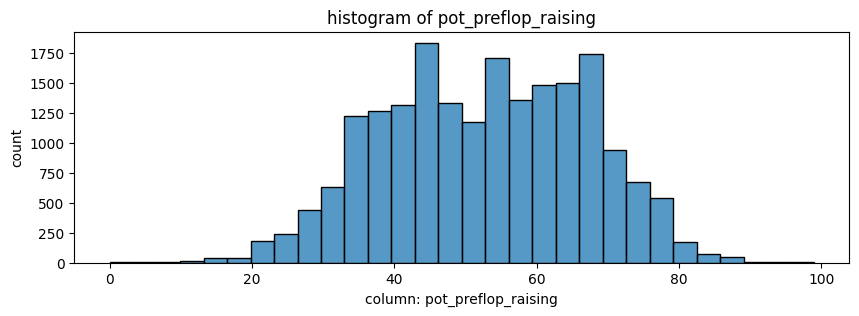

In [ ]:
column = 'pot_preflop_raising'
plt.figure(figsize=(10,3))
sns.histplot(data=poker, x=column, bins=30)
plt.title(f"histogram of {column}")
plt.xlabel(f"column: {column}")
plt.ylabel("count");

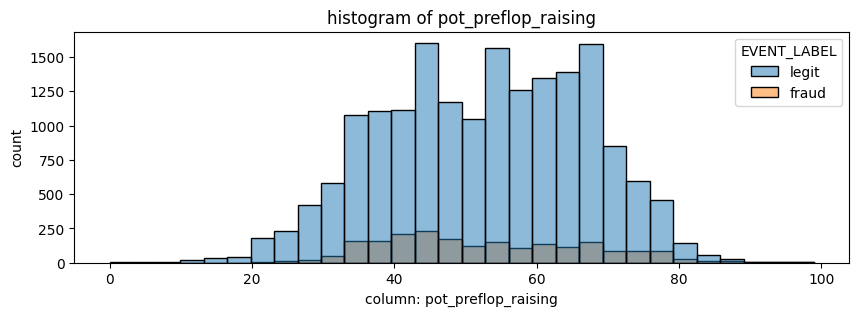

In [ ]:
column = 'pot_preflop_raising'
plt.figure(figsize=(10,3))
sns.histplot(data=poker, x=column, hue='EVENT_LABEL', bins=30)
plt.title(f"histogram of {column}")
plt.xlabel(f"column: {column}")
plt.ylabel("count")
plt.show();

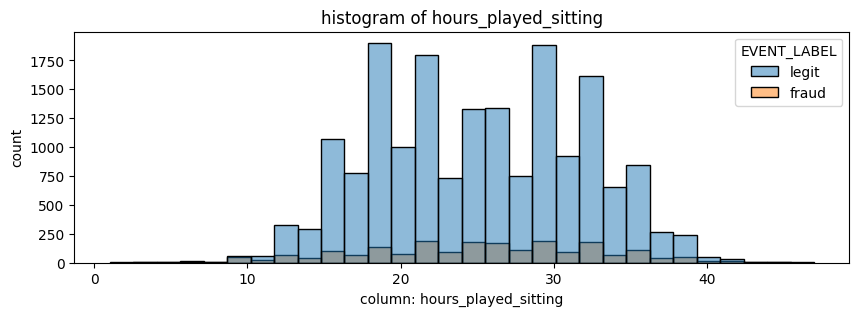

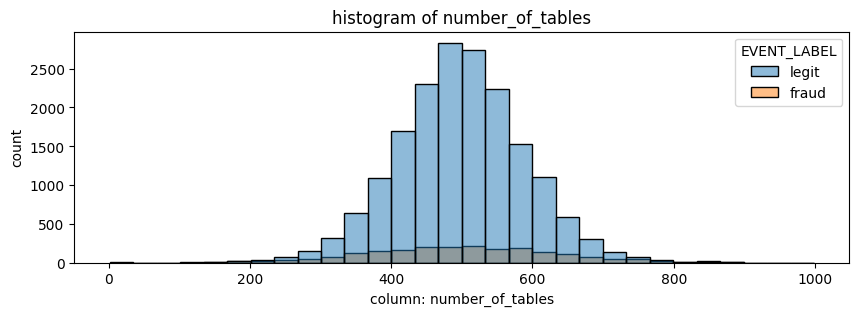

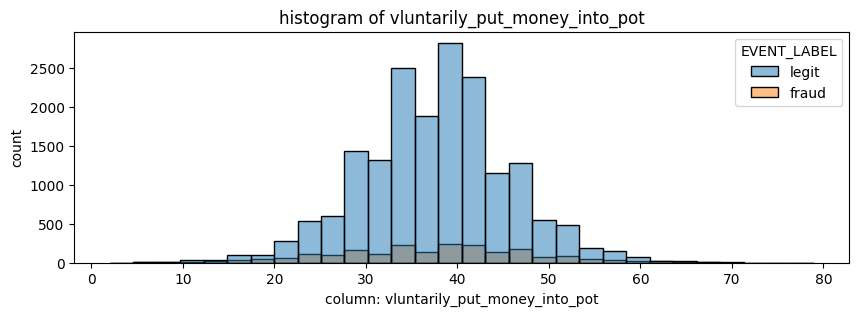

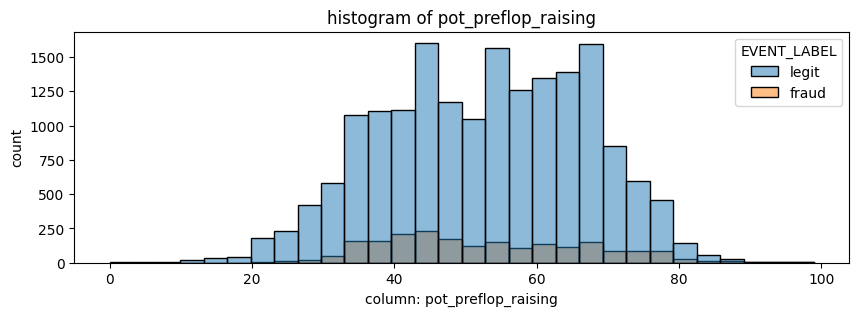

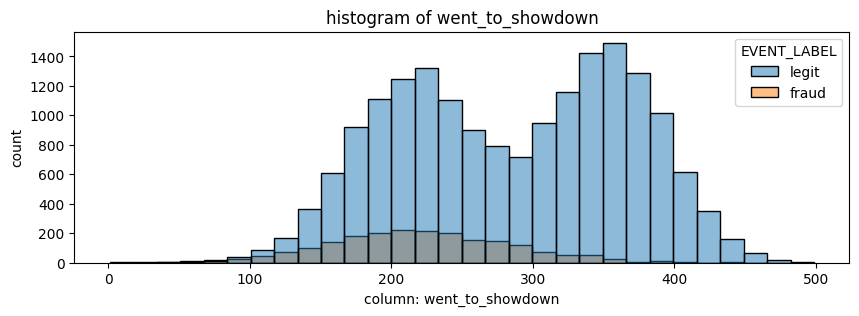

In [ ]:
for column in numeric_vars:
  #column = 'pot_preflop_raising'
  plt.figure(figsize=(10,3))
  sns.histplot(data=poker, x=column, hue='EVENT_LABEL', bins=30)
  plt.title(f"histogram of {column}")
  plt.xlabel(f"column: {column}")
  plt.ylabel("count")
  plt.show();

## CountPlot


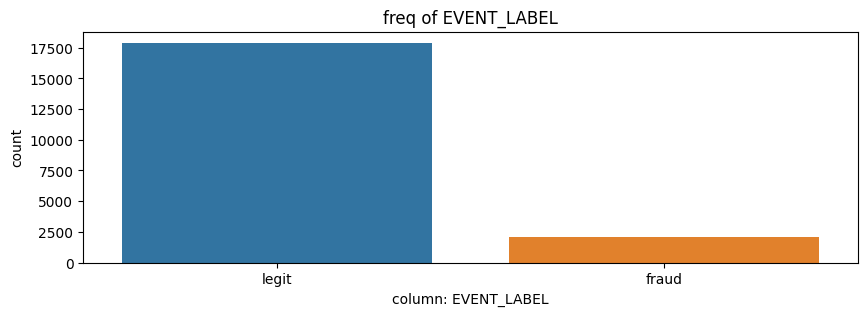

In [ ]:
column = 'EVENT_LABEL'
plt.figure(figsize=(10,3))
sns.countplot(data=poker, x=column)
plt.title(f"freq of {column}")
plt.xlabel(f"column: {column}")
plt.ylabel("count");

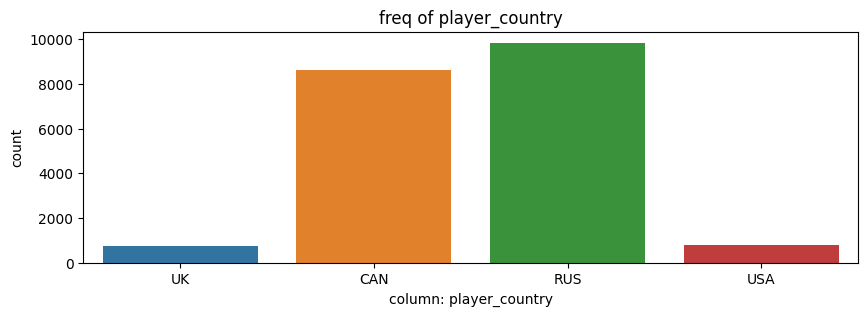

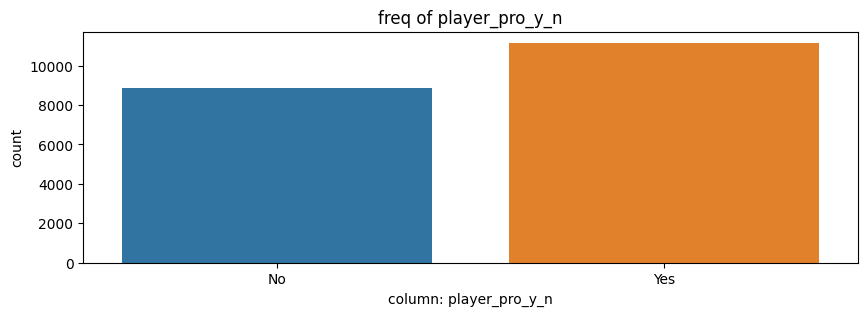

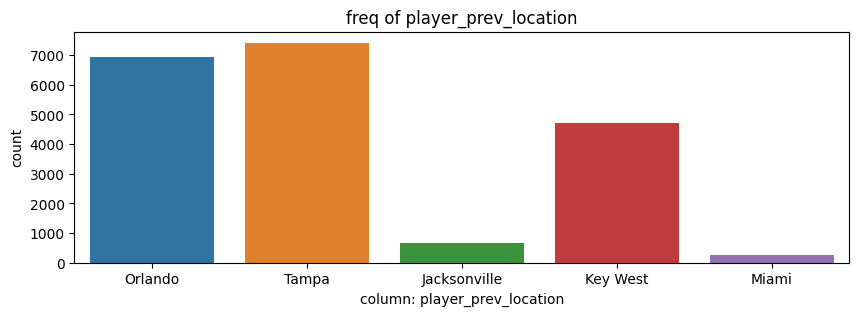

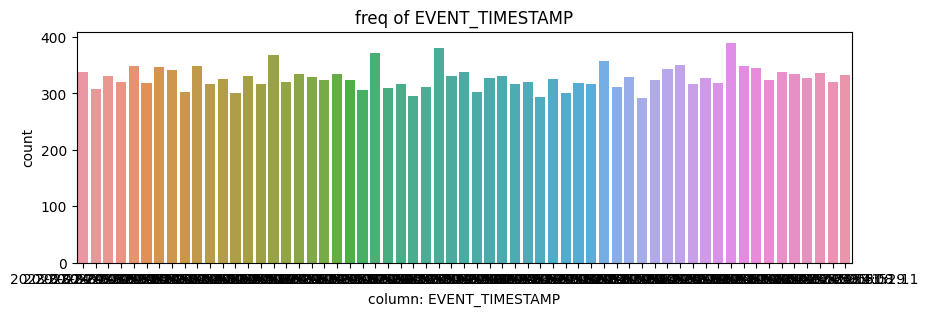

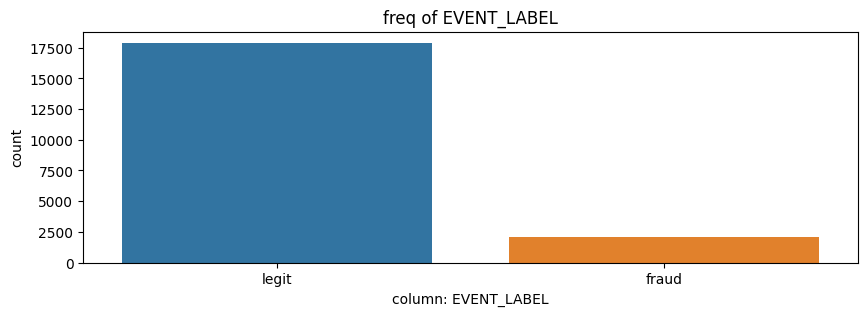

In [ ]:
for column in categorical_vars:
  plt.figure(figsize=(10,3))
  sns.countplot(data=poker, x=column)
  plt.title(f"freq of {column}")
  plt.xlabel(f"column: {column}")
  plt.ylabel("count");

# What are some ways to remove EVENT_TIMESTAMP so we don't make that graph?
1. drop the column
2. remove from list
3. if column != 'EVENT_TIMESTAMP'

In [ ]:
categorical_vars.remove('EVENT_TIMESTAMP')

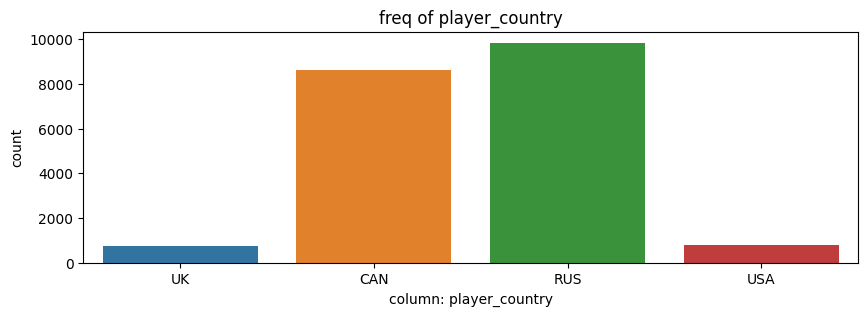

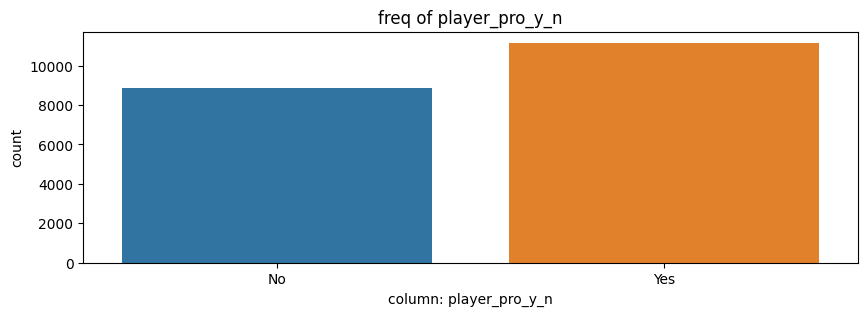

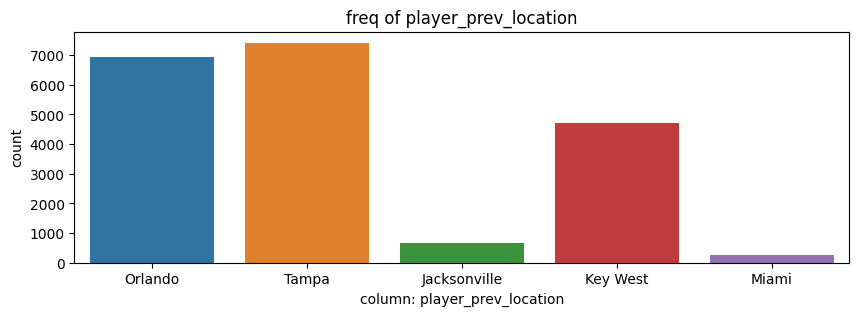

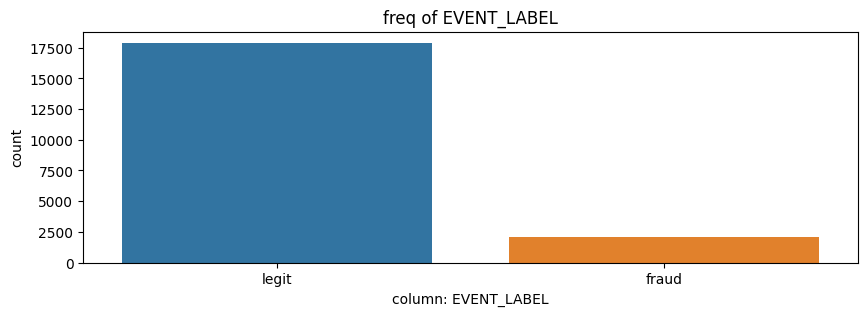

In [ ]:
for column in categorical_vars:
  plt.figure(figsize=(10,3))
  sns.countplot(data=poker, x=column)
  plt.title(f"freq of {column}")
  plt.xlabel(f"column: {column}")
  plt.ylabel("count");

### How do i order my countplot/barplot bars?
```python
order=df['var'].value_counts().index
```

What the heck does that do?



In [ ]:
poker['player_country'].value_counts()

RUS    9845
CAN    8633
USA     770
UK      752
Name: player_country, dtype: int64

In [ ]:
poker['player_country'].value_counts().index

Index(['RUS', 'CAN', 'USA', 'UK'], dtype='object')

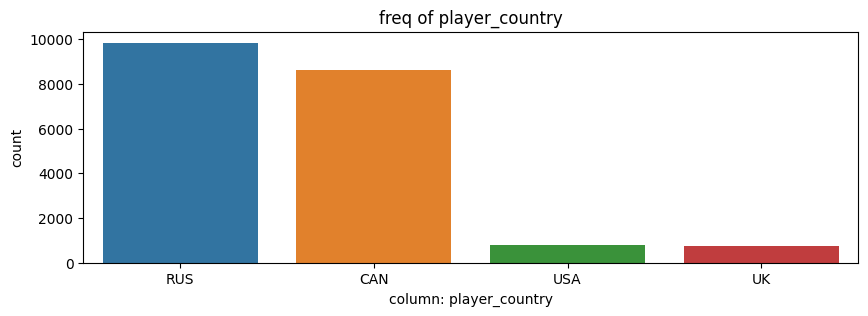

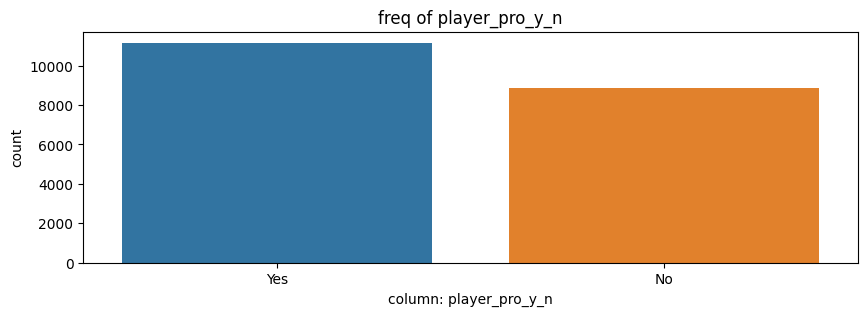

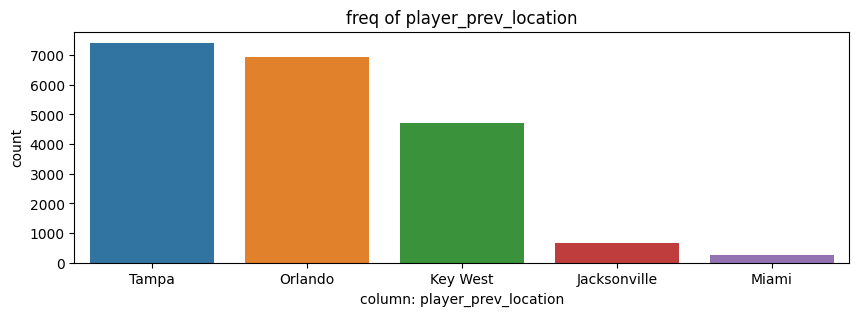

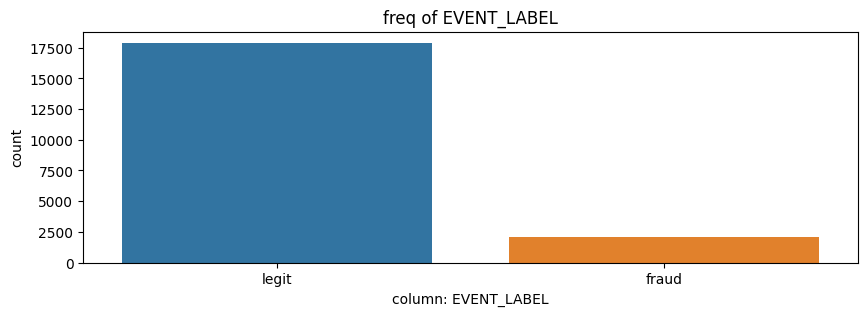

In [ ]:
for column in categorical_vars:
  plt.figure(figsize=(10,3))
  sns.countplot(data=poker,
                x=column,
                order=poker[column].value_counts().index)
  plt.title(f"freq of {column}")
  plt.xlabel(f"column: {column}")
  plt.ylabel("count");